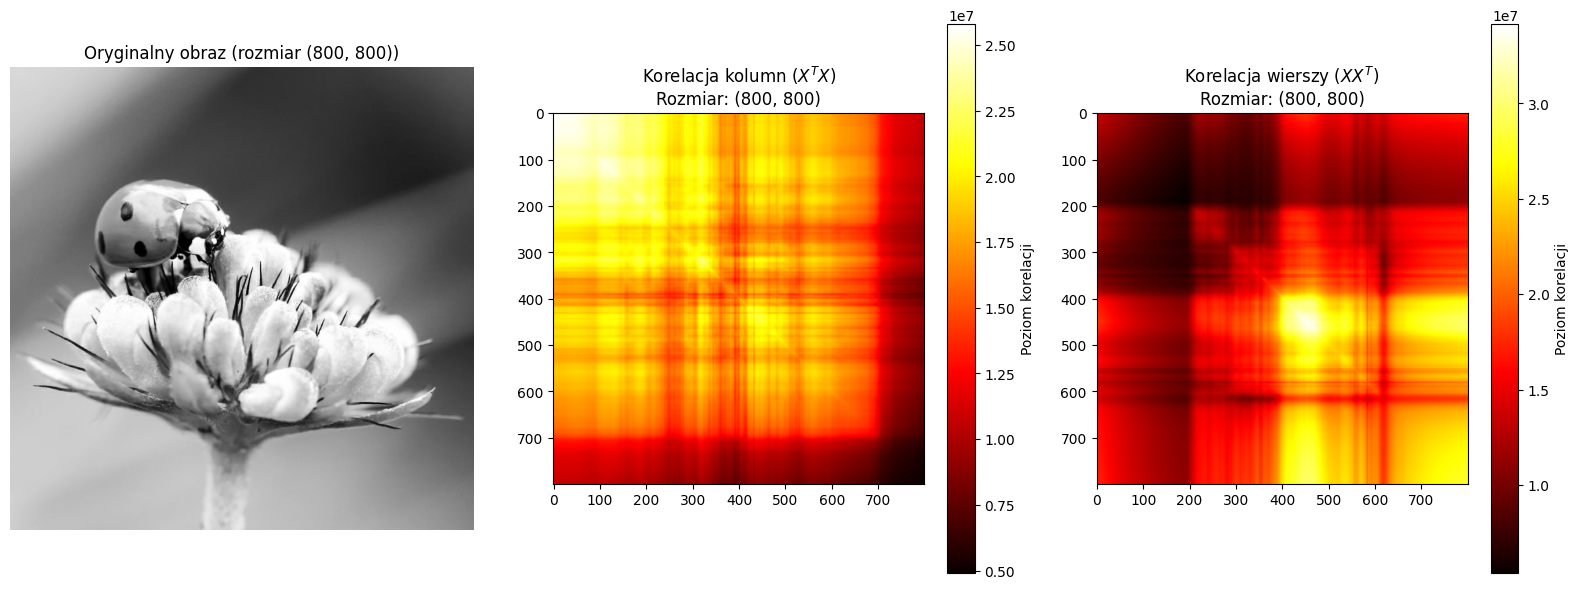

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#1.Wczytanie obrazu (Wariant 5)
try:
    img = Image.open('5.webp').convert('L')
    X = np.array(img, dtype=float)
except FileNotFoundError:
    print("Upewnij się, że plik '5.webp' jest w tym samym folderze.")
  

#2. Obliczenie rozkładu SVD
U, S, Vt = np.linalg.svd(X, full_matrices=False)
Sigma_sq = np.diag(S**2)

#3. Obliczenie macierzy korelacji na podstawie wzorów z pliku PDF
# Korelacja kolumn: X^T * X = V * Sigma^2 * V^T
# Uwaga: Vt to macierz V przetransponowana, więc V = Vt.T
V = Vt.T
XTX = V @ Sigma_sq @ Vt

#Korelacja wierszy: X * X^T = U * Sigma^2 * U^T
XXT = U @ Sigma_sq @ U.T

#4. Wizualizacja
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
plt.imshow(X, cmap='gray')
plt.title(f'Oryginalny obraz (rozmiar {X.shape})')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(XTX, cmap='hot')
plt.title(f'Korelacja kolumn ($X^T X$)\nRozmiar: {XTX.shape}')
plt.colorbar(label='Poziom korelacji')
plt.subplot(1, 3, 3)
plt.imshow(XXT, cmap='hot')
plt.title(f'Korelacja wierszy ($XX^T$)\nRozmiar: {XXT.shape}')
plt.colorbar(label='Poziom korelacji')

plt.tight_layout()
plt.show()